In [1]:
from gamspy import Container, Set, Parameter, Variable, Equation, Model, Sum, Sense, Options
import matplotlib.pyplot as plt
from utils import visualize
import sys

Tenemos: 

- Fabricas:
    - F1: 150 toneladas/mes
    - F2: 200 toneladas/mes
    - F3: 100 toneladas/mes

- Clientes:
    - C1: 100 toneladas/mes
    - C2: 120 toneladas/mes
    - C3: 180 toneladas/mes

Total Oferta: **450** toneladas/mes
Total Demanda: **400** toneladas/mes

Hay un excedente de _50_ toneladas que no pueden ser vendidas este mes.

|    | C1      | C2      | C3      |
| -- | ------- | ------- | ------- |
| F1 | 4       | 5       | 6       |
| F2 | 3       | 7       | 4       |
| F3 | 6       | 2       | 5       |


In [2]:
# 1. Crear Contenedor
container = Container()

In [3]:
# 2. Definir Conjuntos
factories = Set(container=container, name='factories',
                records=['F1', 'F2', 'F3'])
clients = Set(container=container, name='clients', records=['C1', 'C2', 'C3'])

factories, clients

(Set(name='factories', domain=['*']), Set(name='clients', domain=['*']))

In [4]:
# 3. Definir Parametros
offer = Parameter(container=container, name='offer', domain=[
                  factories], records=[['F1', 150], ['F2', 200], ['F3', 100]])

demand = Parameter(container=container, name='demand', domain=[
                   clients], records=[['C1', 100], ['C2', 120], ['C3', 180]])

cost = Parameter(container=container, name='cost', domain=[factories, clients], records=[
    ['F1', 'C1', 4], ['F1', 'C2', 5], ['F1', 'C3', 6],
    ['F2', 'C1', 3], ['F2', 'C2', 7], ['F2', 'C3', 4],
    ['F3', 'C1', 6], ['F3', 'C2', 2], ['F3', 'C3', 5],
])

offer, demand, cost

(Parameter(name='offer', domain=[Set(name='factories', domain=['*'])]),
 Parameter(name='demand', domain=[Set(name='clients', domain=['*'])]),
 Parameter(name='cost', domain=[Set(name='factories', domain=['*']), Set(name='clients', domain=['*'])]))

In [5]:
# 4. Definir Variables
x = Variable(container=container, name='x', domain=[
             factories, clients], type='Positive')

x

Variable(name='x', domain=[Set(name='factories', domain=['*']), Set(name='clients', domain=['*'])], type='positive')

In [6]:
# 5. Definir Equaciones
supply_equation = Equation(
    container=container, name='supply_equation', domain=[factories])

demand_equation = Equation(
    container=container, name='demand_equation', domain=[clients])

supply_equation[factories] = Sum(
    clients, x[factories, clients]) <= offer[factories]

demand_equation[clients] = Sum(
    factories, x[factories, clients]) >= demand[clients]

objective = Sum((factories, clients),
                cost[factories, clients] * x[factories, clients])

supply_equation, demand_equation, objective

(Equation(name='supply_equation', type='eq', domain=[Set(name='factories', domain=['*'])]),
 Equation(name='demand_equation', type='eq', domain=[Set(name='clients', domain=['*'])]),
 Sum(domain=[], expression=Expression(left=ImplicitParameter(parent=Parameter(name='cost', domain=[Set(name='factories', domain=['*']), Set(name='clients', domain=['*'])]), name='cost', domain=[Set(name='factories', domain=['*']), Set(name='clients', domain=['*'])], permutation=None), parent_scalar_domains=[]), data=*, right=ImplicitVariable(parent=Variable(name='x', domain=[Set(name='factories', domain=['*']), Set(name='clients', domain=['*'])], type='positive'), name='x', domain=[Set(name='factories', domain=['*']), Set(name='clients', domain=['*'])], permutation=None, parent_scalar_domains=[]))))

In [7]:
# 6. Crear el Modelo
transport = Model(container=container, name='transport', equations=container.getEquations(
), problem='LP', sense=Sense.MIN, objective=objective)

transport

Model(name='transport', problem='LP', equations=[Equation(name='supply_equation', type='eq', domain=[Set(name='factories', domain=['*'])]), Equation(name='demand_equation', type='eq', domain=[Set(name='clients', domain=['*'])]), Equation(name='transport_objective', type='eq', domain=[])], sense='MIN', objective=Variable(name='transport_objective_variable', domain=[], type='free'), matches=None, limited_variables=None

In [8]:
# 7. Solucionar
transport.solve(output=sys.stdout, options=Options(equation_listing_limit=10, variable_listing_limit=10))

--- Job _d7ae6be1-dc40-4c0c-bc79-13ba96d07d2a.gms Start 04/04/25 10:08:06 49.3.0 7de46a92 WEX-WEI x86 64bit/MS Windows
--- Applying:
    D:\dev\python\gamspy\.venv\Lib\site-packages\gamspy_base\gmsprmNT.txt
--- GAMS Parameters defined
    LP CPLEX
    Input C:\Users\Aquaman\AppData\Local\Temp\tmp6ft45mya\_d7ae6be1-dc40-4c0c-bc79-13ba96d07d2a.gms
    Output C:\Users\Aquaman\AppData\Local\Temp\tmp6ft45mya\_d7ae6be1-dc40-4c0c-bc79-13ba96d07d2a.lst
    ScrDir C:\Users\Aquaman\AppData\Local\Temp\tmp6ft45mya\tmpx3nm2442\
    SysDir D:\dev\python\gamspy\.venv\Lib\site-packages\gamspy_base\
    LogOption 3
    Trace C:\Users\Aquaman\AppData\Local\Temp\tmp6ft45mya\_d7ae6be1-dc40-4c0c-bc79-13ba96d07d2a.txt
    License D:\dev\python\gamspy\.venv\Lib\site-packages\gamspy_base\gamslice.txt
    OptDir C:\Users\Aquaman\AppData\Local\Temp\tmp6ft45mya\
    LimRow 10
    LimCol 10
    TraceOpt 3
    GDX C:\Users\Aquaman\AppData\Local\Temp\tmp6ft45mya\_d7ae6be1-dc40-4c0c-bc79-13ba96d07d2aout.gdx
    SolP

,Solver Status,Model Status,Objective,Num of Equations,Num of Variables,Model Type,Solver,Solver Time
0,Normal,OptimalGlobal,1400,7,10,LP,CPLEX,0


In [9]:
x.records.pivot(index='factories', columns='clients', values='level')

clients,C1,C2,C3
factories,,,
F1,80.0,20.0,0.0
F2,20.0,0.0,180.0
F3,0.0,100.0,0.0


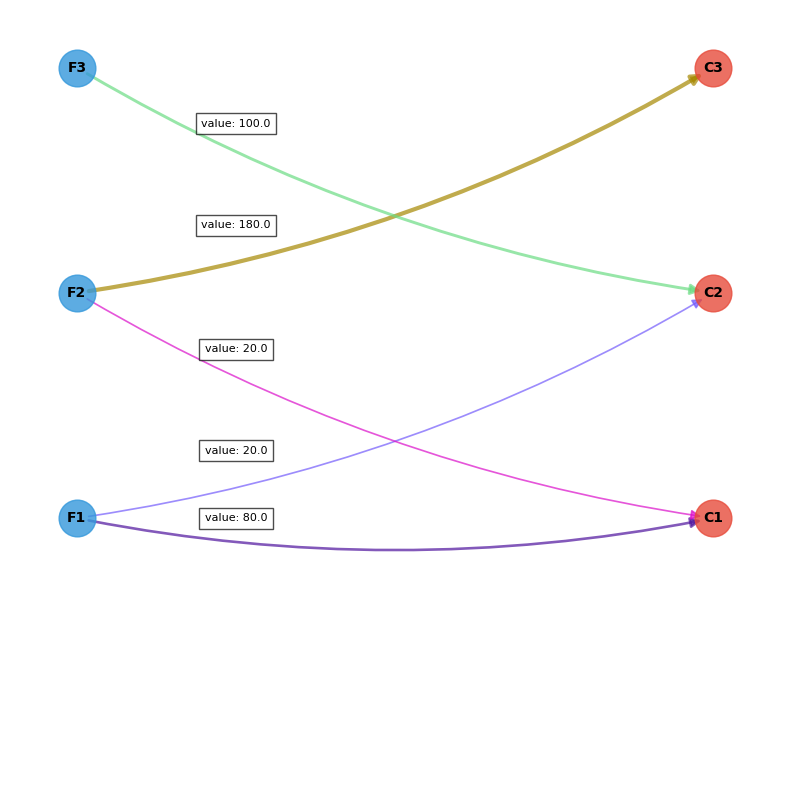

In [11]:
fig, ax = visualize(data=x.records, index='factories', columns='clients', values='level', figsize=(8, 8))
plt.show()